# Tarea 6. Distribución óptima de capital y selección de portafolios.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en el módulo 3. Específicamente, utilizarás técnicas de optimización media-varianza para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea6_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea6_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [5]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680])

annual_ret_summ.round(4)

#REMOVÍ EL RENDIMIENTO LIBRE DE RIESGO DE LA TABLA PARA FACILITAR SU MANEJO EN POSTERIORES

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Media,0.04,0.106,0.083,0.119,0.128,0.062
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068


In [7]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

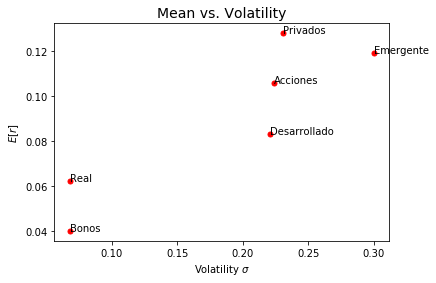

In [8]:
x = annual_ret_summ.loc['Volatilidad'].values
y = annual_ret_summ.loc['Media'].values
plt.figure(figsize=(6,4))
#Axis labels
plt.title('Mean vs. Volatility',fontsize=14)
plt.xlabel('Volatility $\sigma$')
plt.ylabel('$E[r]$')

plt.text(x[0],y[0], 'Bonos')
plt.text(x[1],y[1], 'Acciones')
plt.text(x[2],y[2],'Desarrollado')
plt.text(x[3],y[3],'Emergente')
plt.text(x[4],y[4],'Privados')
plt.text(x[5],y[5],'Real')


#Plot
plt.plot(x,y,'ro',ms=5)
plt.show()

In [9]:
rf = .03

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (5 puntos)

##### 1.1. Encontrar portafolio de mínima varianza

In [10]:
# Importamos minimize del módulo optimize
from scipy.optimize import minimize

In [11]:
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza
D = np.diag(annual_ret_summ.loc['Volatilidad'])
Sigma = D.dot(corr).dot(D)
# 2. Eind: rendimientos esperados activos individuales
Eind = np.array(annual_ret_summ.loc['Media'])

In [12]:
# Función objetivo
def varianza(w, Sigma):
    return w.dot(Sigma).dot(w)

In [13]:
# Dato inicial
w0 = np.ones((6,))/6
# Cotas de las variables
bnds = ((0,1),)*6
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [14]:
# Portafolio de mínima varianza
minvar= minimize(varianza, w0, args = (Sigma,), bounds = bnds, constraints=cons)
minvar

     fun: 0.0027745037325952863
     jac: array([ 0.00551408,  0.00912289,  0.00525779,  0.00714968,  0.00710235,
        0.0055834 ])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([  4.95146500e-01,   0.00000000e+00,   2.09837058e-04,
         4.33680869e-19,   0.00000000e+00,   5.04643663e-01])

In [15]:
# Pesos, rendimiento y riesgo del portafolio de mínima varianza
w_minvar = minvar.x
Er_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, Sigma))
w_minvar, Er_minvar, s_minvar

(array([  4.95146500e-01,   0.00000000e+00,   2.09837058e-04,
          4.33680869e-19,   0.00000000e+00,   5.04643663e-01]),
 0.0511111835712562,
 0.052673558191898201)

In [16]:
minvar_sharpe = (Er_minvar-rf)/s_minvar
minvar_sharpe

0.40079281324312249

##### 1.2. Encontrar portafolio EMV

In [48]:
# Función objetivo
def m_sharpe_r(w, Sigma, rf, Eind):
    Erp = Eind.dot(w)
    varp = w.dot(Sigma).dot(w)
    return -(Erp-rf)/np.sqrt(varp)

In [49]:
# Dato inicial
w0 = np.ones((6,))/6
# Cotas de las variables
bnds = ((0,1),)*6
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [50]:
# Portafolio EMV
EMV = minimize(m_sharpe_r, w0, args=(Sigma,rf, Eind), bounds=bnds, constraints = cons)
EMV

     fun: -0.5811986201269204
     jac: array([-0.36522095, -0.28920724, -0.12258474, -0.36597763, -0.36617207,
       -0.36620118])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([  1.34289953e-17,   1.01738175e-16,   1.23637069e-16,
         8.19187951e-02,   1.65859031e-01,   7.52222174e-01])

In [51]:
# Pesos, rendimiento y riesgo del portafolio EMV
w_EMV = EMV.x
Er_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(w_EMV.dot(Sigma.dot(w_EMV)))
w_EMV, Er_EMV, s_EMV

(array([  1.34289953e-17,   1.01738175e-16,   1.23637069e-16,
          8.19187951e-02,   1.65859031e-01,   7.52222174e-01]),
 0.0776160673678556,
 0.081927357909861095)

In [52]:
emv_sharpe = (Er_EMV-rf)/s_EMV
emv_sharpe

0.58119862012692036

## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

In [53]:
# Covarianza entre los portafolios
cov = w_minvar.dot(Sigma).dot(w_EMV)
cov

0.0029818190366882494

In [54]:
# Correlación entre los portafolios
corr = cov/(s_minvar*s_EMV)
corr

0.69097077162616571

In [89]:
# Vector de w
w = np.linspace(-2, 4, 100)

In [90]:
# DataFrame de Frontera de minima varianza: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio

frontera = pd.DataFrame(columns=['w(EMV)', 'w(minvar)', 'E[r]', 'sigma', 'R.S.'])
frontera['w(EMV)'] = w
frontera['w(minvar)'] = 1-w
frontera['E[r]'] = w*Er_EMV +(1-w)*Er_minvar
frontera['sigma'] = np.sqrt((w*s_EMV)**2 + ((1-w)*s_minvar)**2 + 2*w*(1-w)*cov)
frontera['R.S.'] = (frontera['E[r]']-rf)/frontera['sigma']
frontera

,w(EMV),w(minvar),E[r],sigma,R.S.
0,-2.000000,3.000000,-0.001899,0.126638,-0.251889
1,-1.939394,2.939394,-0.000292,0.123374,-0.245532
2,-1.878788,2.878788,0.001314,0.120129,-0.238792
3,-1.818182,2.818182,0.002920,0.116905,-0.231637
4,-1.757576,2.757576,0.004527,0.113703,-0.224032
5,-1.696970,2.696970,0.006133,0.110526,-0.215939
6,-1.636364,2.636364,0.007740,0.107375,-0.207315
7,-1.575758,2.575758,0.009346,0.104253,-0.198115
8,-1.515152,2.515152,0.010952,0.101163,-0.188288
9,-1.454545,2.454545,0.012559,0.098107,-0.177780


In [116]:
# Vector de wp variando entre 0 y 1.5 con n pasos
n = 101
wp = np.linspace(0, 3, n)


In [117]:
# DataFrame de LAC: 
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
LAC = pd.DataFrame(index=np.arange(n), columns=['wp','wrf','E[r]','sigma','SR'])
LAC['wp'] = wp
LAC['wrf']= 1-wp
LAC['E[r]']= wp*Er_EMV+(1-wp)*rf
LAC['sigma']= wp*s_EMV
LAC['SR'] = (LAC['E[r]']-rf)/LAC['sigma']

LAC.round(4)

,wp,wrf,E[r],sigma,SR
0,0.00,1.00,0.0300,0.0000,NaN
1,0.03,0.97,0.0314,0.0025,0.5812
2,0.06,0.94,0.0329,0.0049,0.5812
3,0.09,0.91,0.0343,0.0074,0.5812
4,0.12,0.88,0.0357,0.0098,0.5812
5,0.15,0.85,0.0371,0.0123,0.5812
6,0.18,0.82,0.0386,0.0147,0.5812
7,0.21,0.79,0.0400,0.0172,0.5812
8,0.24,0.76,0.0414,0.0197,0.5812
9,0.27,0.73,0.0429,0.0221,0.5812


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

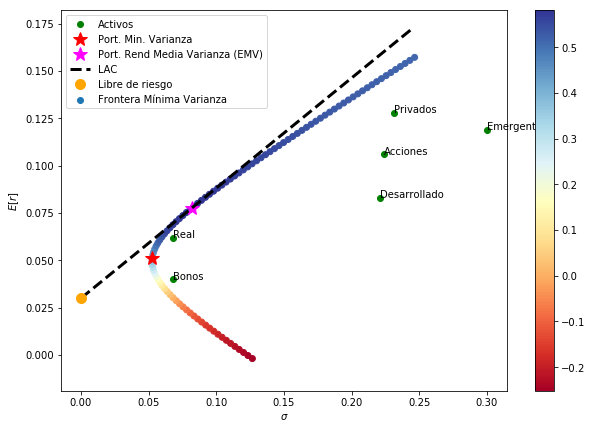

In [155]:
# Gráfica de dispersión de puntos coloreando MINVar y EMV 
# de acuerdo a SR
plt.figure(figsize=(10,7))
plt.scatter(frontera['sigma'], frontera['E[r]'], c = frontera['R.S.'], cmap='RdYlBu', 
            label='Frontera Mínima Varianza') #frontera de min var de n activos
plt.plot(annual_ret_summ.loc['Volatilidad'], annual_ret_summ.loc['Media'], 'og', label='Activos') #activos individuales

plt.text(x[0],y[0], 'Bonos')
plt.text(x[1],y[1], 'Acciones')
plt.text(x[2],y[2],'Desarrollado')
plt.text(x[3],y[3],'Emergente')
plt.text(x[4],y[4],'Privados')
plt.text(x[5],y[5],'Real')

plt.plot(s_minvar, Er_minvar, '*r', ms=15, label = 'Port. Min. Varianza') #portafolios de minvar y EMV
plt.plot(s_EMV, Er_EMV, '*', color = 'magenta', ms=15, label = 'Port. Rend Media Varianza (EMV)')
plt.plot(LAC['sigma'],LAC['E[r]'],'k--',lw=3, label = 'LAC')
plt.plot(0, rf, 'o', color='orange', ms=10, label='Libre de riesgo')
plt.colorbar()
plt.xlabel('$\sigma$')
plt.ylabel('$E[r]$')
plt.legend(loc='best')
plt.show()

**CONCLUSIÓN: ** 

In [157]:
gamma = 4
w = (Er_EMV-rf)/(gamma * s_EMV**2)
w

1.7735181353168143

Como la ponderación es mayor a 1, entonces se le recomendaría al cliente que tome una apalancamiento. Con esto puede tomar una posición corta en el activo libre de riesgo (-77%), mientras que tiene que tomar una posición larga en los activos de mercado del (177%). 
Esta asignación le provee el portafolio de media varianza, de mejor opción dentro de la frontera de mínima varianza.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>